# Exercise notebook :

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
london = pd.read_csv('London_2014.csv', skipinitialspace=True)
london.head()

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66.0,9.91,4.0,Rain,186<br />
1,2014-1-2,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50.0,1.02,2.0,Rain,214<br />
2,2014-1-3,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69.0,7.11,2.0,Rain-Thunderstorm,219<br />
3,2014-1-4,9,6,3,8,6,2,93,85,65,...,31,12,5,35,21,39.0,9.91,4.0,Rain,211<br />
4,2014-1-5,12,7,1,11,4,-1,100,88,77,...,31,14,5,35,16,NaN,0.25,5.0,Rain,199<br />


`Note that the right hand side of the table has been cropped to fit on the page.
You’ll find out how to remove rogue spaces.`

## Every picture tells a story

It can be difficult and confusing to look at a table of rows of numbers and make any
meaningful interpretation especially if there are many rows and columns.
Handily, pandas has a method called **plot()** which will visualise data for us by producing
a chart.

The following line of code tells Jupyter to display inside this notebook any graph that is created.

In [ ]:
%matplotlib inline

The `plot()` method can make a graph of the values in a column. Gridlines are turned on by the `grid` argument.

To plot `‘Max Wind SpeedKm/h ’`, it’s as simple as this code:

<AxesSubplot:>

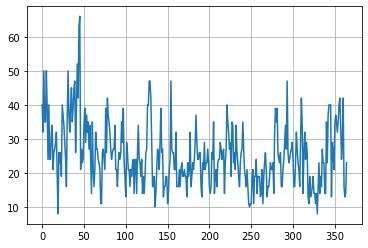

In [3]:
london['Max Wind SpeedKm/h'].plot(grid=True)

The `grid=True` argument makes the gridlines (the dotted lines in the image above)
appear, which make values easier to read on the chart. The chart comes out a bit small,
so the graph can be made bigger by giving the method a `figsize=(x,y)` argument where `x` and `y` are integers that determine the length of the `x-axis` and `y-axis`.

In [ ]:
london['Max Wind SpeedKm/h'].plot(grid=True, figsize=(10,5))

That’s better! The argument given to the `plot()` method, `figsize=(10,5)` simply tells
`plot()` that the `x-axis` should be 10 units wide and the `y-axis` should be 5 units high. In
the above graph the `x-axis` (the numbers at the bottom) shows the dataframe’s index, so 0
is 1 January and 50 is 18 February.
The `y-axis` (the numbers on the side) shows the range of wind speed in kilometres per
hour. It is clear that the windiest day in 2014 was somewhere in mid-February and the
wind reached about `66 kilometers per hour`.
By default, the `plot()` method will try to generate a line, although as you’ll see in a later
modules, it can produce other chart types too.

Multiple lines can be plotted by selecting multiple columns.

In [ ]:
london[['Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h']].plot(grid=True, figsize=(10,5))

### Task

In the cell below, write code to plot the minimum, mean, and maximum temperature during 2014 in London.

<AxesSubplot:>

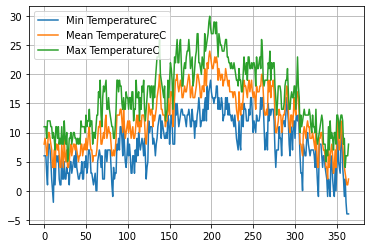

In [4]:
london[['Min TemperatureC', 'Mean TemperatureC', 'Max TemperatureC',]].plot(grid=True)

## Changing a dataframe's index
We have seen that by default every dataframe has an integer index for its rows which
starts from `0`.
The dataframe we’ve been using, london , has an index that goes from `0 to 364`. The
row indexed by 0 holds data for the first day of the year and the row indexed by 364 holds
data for the last day of the year. However, the column `'GMT' holds datetime64` values
which would make a more intuitive index.
Changing the index to `datetime64` values is as easy as assigning to the dataframe’s
index attribute the contents of the `'GMT'` column, is done by assigning to the dataframe's `index` attribute the contents of the `'GMT`' column, like this:

In [5]:
london['GMT'] = pd.to_datetime(london['GMT'])

In [6]:
london.index = london['GMT']
london.head(2)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
GMT,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66.0,9.91,4.0,Rain,186<br />
2014-01-02,2014-01-02,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50.0,1.02,2.0,Rain,214<br />


`Notice that the 'GMT' column still remains and that the index has been labelled to show
that it has been derived from the 'GMT' column.`

The `iloc` attribute can still be used to get and display rows by number, but now you can now also use the `datetime64` index to get a row by date, using the dataframe's `loc` attribute, like this:

In [7]:
london.loc[datetime(2014, 1, 1)]

GMT                           2014-01-01 00:00:00
Max TemperatureC                               11
Mean TemperatureC                               8
Min TemperatureC                                6
Dew PointC                                      9
MeanDew PointC                                  7
Min DewpointC                                   4
Max Humidity                                   94
Mean Humidity                                  86
Min Humidity                                   73
Max Sea Level PressurehPa                    1002
Mean Sea Level PressurehPa                    993
Min Sea Level PressurehPa                     984
Max VisibilityKm                               31
Mean VisibilityKm                              11
Min VisibilitykM                                2
Max Wind SpeedKm/h                             40
Mean Wind SpeedKm/h                            26
Max Gust SpeedKm/h                           66.0
Precipitationmm                              9.91


A query such as *'Return all the rows where the date is between December 8th and December 12th'* can now be done  succinctly like this:

In [8]:
london.loc[datetime(2014,12,8) : datetime(2014,12,12)]

#The meaning of the above code is get the rows beween and including 
#the indices datetime(2014,12,8) and datetime(2014,12,12)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
GMT,,,,,,,,,,,,,,,,,,,,,
2014-12-08,2014-12-08,7,4,1,2,1,-1,93,76,51,...,31,17,10,23,13,NaN,0.00,2.0,Rain,270<br />
2014-12-09,2014-12-09,12,6,-1,11,3,-1,100,86,64,...,31,15,3,37,14,52.0,0.25,5.0,Rain,224<br />
2014-12-10,2014-12-10,9,7,6,11,3,1,90,70,44,...,31,18,3,40,27,NaN,0.00,2.0,Rain,246<br />
2014-12-11,2014-12-11,10,8,5,6,3,2,82,72,51,...,31,15,10,40,31,NaN,0.25,2.0,Rain,246<br />
2014-12-12,2014-12-12,9,6,2,9,4,-1,94,79,59,...,31,11,3,40,26,55.0,1.02,3.0,Rain,253<br />


Because the table is in date order, we can be confident that only the rows with dates
between 8 December 2014 and 12 December 2014 (inclusive) will be returned. However if
the table had not been in date order, we would have needed to sort it first, like this:

In [ ]:
london = london.sort_index()
london

Now we have a `datetime64` index, let's plot `'Max Wind SpeedKm/h'` again:

<AxesSubplot:xlabel='GMT'>

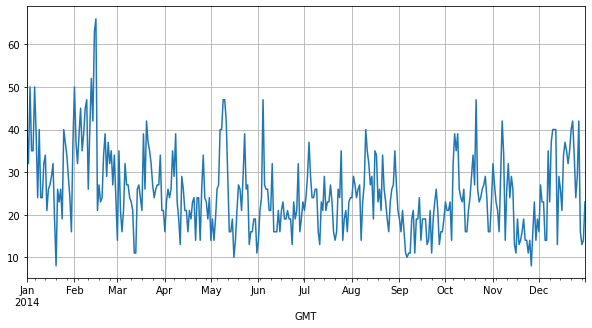

In [9]:
london['Max Wind SpeedKm/h'].plot(grid=True, figsize=(10,5))

Now it is much clearer that the worst winds were in mid February.

### Task
Use the code cell below to plot the values of `'Mean Humidity'` during spring (full months of March, April and May).

In [10]:
london['Mean Humidity'] = pd.to_datetime(london[''])

In [11]:
london.loc[datetime(2014,3,1) : datetime(2014,5,31)]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
GMT,,,,,,,,,,,,,,,,,,,,,
2014-03-01,2014-03-01,10,6,1,4,1,-2,100,1970-01-01 00:00:00.000000075,35,...,31,9,0,14,8,NaN,0.00,2.0,Fog,273<br />
2014-03-02,2014-03-02,10,6,2,6,4,1,93,1970-01-01 00:00:00.000000082,56,...,31,12,6,35,18,53.0,0.25,4.0,Rain,190<br />
2014-03-03,2014-03-03,9,6,3,5,3,2,93,1970-01-01 00:00:00.000000083,63,...,31,14,10,21,10,NaN,0.76,3.0,Rain,191<br />
2014-03-04,2014-03-04,11,6,0,5,2,-1,100,1970-01-01 00:00:00.000000078,47,...,31,13,5,16,8,NaN,0.00,3.0,Fog-Rain,265<br />
2014-03-05,2014-03-05,13,7,0,4,2,-1,100,1970-01-01 00:00:00.000000072,40,...,31,15,8,21,6,NaN,0.25,1.0,NaN,248<br />
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-27,2014-05-27,13,12,10,12,10,8,94,1970-01-01 00:00:00.000000087,74,...,26,10,3,16,11,NaN,0.51,6.0,Rain,323<br />
2014-05-28,2014-05-28,14,12,9,12,11,8,94,1970-01-01 00:00:00.000000088,73,...,31,12,3,16,11,NaN,0.00,6.0,Rain,296<br />
2014-05-29,2014-05-29,19,16,13,13,12,10,94,1970-01-01 00:00:00.000000078,47,...,31,12,6,19,8,NaN,0.00,3.0,Rain,93<br />


<AxesSubplot:xlabel='GMT'>

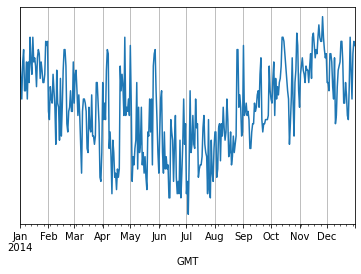

In [12]:
london['Mean Humidity'].plot(grid=True)

Your project this week is to find out what would have been the best two weeks of weather
for a 2014 vacation in a capital of a **BRICS** country.

I’ve written up my analysis of the best two weeks of weather in London, UK, which you can
open in project notebook.
The structure is very simple: besides the introduction and the conclusions, there is one
section for each step of the analysis – obtaining, cleaning and visualising the data.
Once you’ve worked through my analysis you should open a dataset for just one of the
BRICS capitals: Brasilia, Moscow, Delhi, Beijing or Cape Town, the dataset has been downloade and can be found in the folder. The choice of capital is up
to you. You should then work out the best two weeks, according to the weather, to choose
for a two-week holiday in your chosen capital city.

Once again, do not open the file with Excel , but you could take a look using a text
editor.
In my project, I was looking for a two
week period that had relatively high temperatures and little rain. If you choose a capital in
a particularly hot and dry country you will probably be looking for relatively cool weather
and low humidity.

Note that the London file has the dates in a column named ‘GMT’ whereas in the BRICS
files they are in a column named ‘Date’. You will need to change the Python code
accordingly. You should also change the name of the variable, London, according to the
capital you choose.

## GOOD LUCK!